# Data Analysis- I.P.L

This is a data analysis project on a dataset of Indian Premier League, a cricket league in INDIA. This dataset is available on kaggle. I will be analysing the data of matches played and records of teams. I will be using pandas library of python for importing datasets as dataframes and manupulate the data. Also, matplotlib and seaborn libraries will be used for visualising the data. 

The course [Data Analysis with Python: Zero to Pandas](zerotopandas.com) is a superb course, the instructor has gone through all major methods and functions of numpy,pandas,matplotlib and seaborn libraries. Anyone with basic or even no knowledge of programming can learn from this course.

### How to run the code

This is an executable [*Jupyter notebook*](https://jupyter.org) hosted on [Jovian.ml](https://www.jovian.ml), a platform for sharing data science projects. You can run and experiment with the code in a couple of ways: *using free online resources* (recommended) or *on your own computer*.

#### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing this notebook is to click the "Run" button at the top of this page, and select "Run on Binder". This will run the notebook on [mybinder.org](https://mybinder.org), a free online service for running Jupyter notebooks. You can also select "Run on Colab" or "Run on Kaggle".


#### Option 2: Running on your computer locally

1. Install Conda by [following these instructions](https://conda.io/projects/conda/en/latest/user-guide/install/index.html). Add Conda binaries to your system `PATH`, so you can use the `conda` command on your terminal.

2. Create a Conda environment and install the required libraries by running these commands on the terminal:

```
conda create -n zerotopandas -y python=3.8 
conda activate zerotopandas
pip install jovian jupyter numpy pandas matplotlib seaborn opendatasets --upgrade
```

3. Press the "Clone" button above to copy the command for downloading the notebook, and run it on the terminal. This will create a new directory and download the notebook. The command will look something like this:

```
jovian clone notebook-owner/notebook-id
```



4. Enter the newly created directory using `cd directory-name` and start the Jupyter notebook.

```
jupyter notebook
```

You can now access Jupyter's web interface by clicking the link that shows up on the terminal or by visiting http://localhost:8888 on your browser. Click on the notebook file (it has a `.ipynb` extension) to open it.


## Downloading the Dataset

This dataset is available on kaggle.com. This dataset contains information about matches of a most expensive cricket league of the world, played in INDIA - Indian Premier League.

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
# Change this
dataset_url = 'https://www.kaggle.com/ramjidoolla/ipl-data-set' 

In [3]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: dhurvladdha
Your Kaggle Key: ········


100%|██████████| 1.24M/1.24M [00:00<00:00, 97.0MB/s]

The dataset has been downloaded and extracted.

In [4]:
# Change this
data_dir = './ipl-data-set'

In [47]:
import os
os.listdir(data_dir)

['deliveries.csv',
 'teams.csv',
 'teamwise_home_and_away.csv',
 'most_runs_average_strikerate.csv',
 'Players.xlsx',
 'matches.csv']

Let us save and upload our work to Jovian before continuing.

In [322]:
project_name = "data-analysis-of-ipl" # change this (use lowercase letters and hyphens only)

In [7]:
!pip install jovian --upgrade -q

In [324]:
import jovian

In [325]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "dhurvladdha-cse22/data-analysis-of-ipl" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/dhurvladdha-cse22/data-analysis-of-ipl


'https://jovian.ml/dhurvladdha-cse22/data-analysis-of-ipl'

## Data Preparation and Cleaning

Here, we see the basic details of dataset like no of records or rows, no of fields or columns, mean of all integer type columns etc. Also, any missing values or NaN values or incorrect values are managed. Not needed columns are dropped etc.



In [49]:
import pandas as pd

In [61]:
matches_df=pd.read_csv('./ipl-data-set/matches.csv')
teams_df=pd.read_csv('./ipl-data-set/teams.csv')
deliveries_df=pd.read_csv('./ipl-data-set/deliveries.csv')

In [62]:
matches_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [63]:
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [65]:
matches_df.describe()

,id,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,0.025132,13.283069,3.350529
std,3464.478148,0.156630,23.471144,3.387963
min,1.000000,0.000000,0.000000,0.000000
25%,189.750000,0.000000,0.000000,0.000000
50%,378.500000,0.000000,0.000000,4.000000
75%,567.250000,0.000000,19.000000,6.000000
max,11415.000000,1.000000,146.000000,10.000000


In [15]:
# lets remove NaN values from Umpire columns and set them as "no umpire" 

In [264]:
matches_df.update(matches_df[['umpire3','umpire1','umpire2']].fillna('No Umpire'))

In [266]:
matches_df=matches_df.replace({'Rising Pune Supergiants':'Rising Pune Supergiant'}).drop_duplicates().reset_index(drop=True)
matches_df.head(3)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,No Umpire
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,No Umpire
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,No Umpire


In [18]:
# Now removing records or rows where atleast ine value is NaN

In [263]:
matches_df.dropna().head(5)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
636,7894,IPL-2018,Mumbai,07-04-2018,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,1,DJ Bravo,Wankhede Stadium,Chris Gaffaney,A Nanda Kishore,Anil Chaudhary
637,7895,IPL-2018,Mohali,08-04-2018,Delhi Daredevils,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,KL Rahul,"Punjab Cricket Association IS Bindra Stadium, ...",Rod Tucker,K Ananthapadmanabhan,Nitin Menon
638,7896,IPL-2018,Kolkata,08-04-2018,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,4,SP Narine,Eden Gardens,C Shamshuddin,A.D Deshmukh,S Ravi
639,7897,IPL-2018,Hyderabad,09-04-2018,Rajasthan Royals,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,S Dhawan,"Rajiv Gandhi International Stadium, Uppal",Nigel Llong,Vineet Kulkarni,O Nandan
640,7898,IPL-2018,Chennai,10-04-2018,Kolkata Knight Riders,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,5,SW Billings,"MA Chidambaram Stadium, Chepauk",Anil Chaudhary,Chris Gaffaney,A Nanda Kishore


In [66]:
# Now lets see other dataframes

In [91]:
teams_record_homeaway_df=pd.read_csv('./ipl-data-set/teamwise_home_and_away.csv')

In [92]:
teams_record_homeaway_df

,team,home_wins,away_wins,home_matches,away_matches,home_win_percentage,away_win_percentage
0,Rising Pune Supergiant,5,5,8,8,62.500000,62.500000
1,Mumbai Indians,58,51,101,86,57.425743,59.302326
2,Chennai Super Kings,51,49,89,75,57.303371,65.333333
3,Delhi Capitals,3,7,6,10,50.000000,70.000000
4,Sunrisers Hyderabad,30,28,63,45,47.619048,62.222222
5,Rajasthan Royals,29,46,67,80,43.283582,57.500000
6,Deccan Chargers,18,11,43,32,41.860465,34.375000
7,Kings XI Punjab,38,44,91,85,41.758242,51.764706
8,Royal Challengers Bangalore,35,49,85,95,41.176471,51.578947
9,Kolkata Knight Riders,34,58,83,95,40.963855,61.052632


In [69]:
teams_df

,team1
0,Pune Warriors
1,Kolkata Knight Riders
2,Rajasthan Royals
3,Kochi Tuskers Kerala
4,Gujarat Lions
5,Chennai Super Kings
6,Rising Pune Supergiants
7,Delhi Daredevils
8,Deccan Chargers
9,Delhi Capitals


In [96]:
# There are two duplicate teams, lets change "Rising Pune Supergiants" to "Rising Pune Supergiant" and remove duplicates

In [76]:
teams_df=teams_df.replace({'Rising Pune Supergiants':'Rising Pune Supergiant'}).drop_duplicates().reset_index(drop=True)

In [77]:
teams_df

,team1
0,Pune Warriors
1,Kolkata Knight Riders
2,Rajasthan Royals
3,Kochi Tuskers Kerala
4,Gujarat Lions
5,Chennai Super Kings
6,Rising Pune Supergiant
7,Delhi Daredevils
8,Deccan Chargers
9,Delhi Capitals


In [78]:
# lets see deliveries dataset

In [315]:
deliveries_df[120:128]

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
120,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,20,2,DJ Hooda,BCJ Cutting,SR Watson,0,...,0,0,0,0,1,0,1,No dismissal,No dismissal,no fielder involved
121,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,20,3,BCJ Cutting,DJ Hooda,SR Watson,0,...,0,0,0,0,6,0,6,No dismissal,No dismissal,no fielder involved
122,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,20,4,BCJ Cutting,DJ Hooda,SR Watson,0,...,0,0,0,0,2,0,2,No dismissal,No dismissal,no fielder involved
123,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,20,5,BCJ Cutting,DJ Hooda,SR Watson,0,...,0,0,0,0,0,0,0,No dismissal,No dismissal,no fielder involved
124,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,20,6,BCJ Cutting,DJ Hooda,SR Watson,0,...,0,0,0,0,6,0,6,No dismissal,No dismissal,no fielder involved
125,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,Mandeep Singh,A Nehra,0,...,0,0,0,0,1,0,1,No dismissal,No dismissal,no fielder involved
126,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,CH Gayle,A Nehra,0,...,0,0,0,0,0,0,0,No dismissal,No dismissal,no fielder involved
127,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,CH Gayle,A Nehra,0,...,0,0,0,0,0,0,0,No dismissal,No dismissal,no fielder involved


In [80]:
# removing NaN from "player_dismissed","dismissal_kind" columns as "no dismissal"

In [81]:
deliveries_df.update(deliveries_df[["player_dismissed","dismissal_kind"]].fillna('No dismissal'))

In [261]:
deliveries_df=deliveries_df.replace({'Rising Pune Supergiants':'Rising Pune Supergiant'}).drop_duplicates().reset_index(drop=True)
deliveries_df.head(3)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,No dismissal,No dismissal,no fielder involved
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,No dismissal,No dismissal,no fielder involved
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,No dismissal,No dismissal,no fielder involved


In [83]:
# now setting NaN values in "fielder" column as "no fielder involved"

In [260]:
deliveries_df['fielder'].fillna('no fielder involved',inplace=True)
deliveries_df.head(3)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,No dismissal,No dismissal,no fielder involved
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,No dismissal,No dismissal,no fielder involved
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,No dismissal,No dismissal,no fielder involved


In [99]:
# now removing all NaN values

In [259]:
deliveries_df.dropna().head(3)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,No dismissal,No dismissal,no fielder involved
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,No dismissal,No dismissal,no fielder involved
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,No dismissal,No dismissal,no fielder involved


In [101]:
# creating a new dataframe "dismissal_df" using deliveries dataframe 

In [102]:
dismissal_df=deliveries_df[deliveries_df['dismissal_kind']!='No dismissal']

In [267]:
dismissal_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
11,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,5,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,0,0,0,0,DA Warner,caught,Mandeep Singh
64,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,11,3,S Dhawan,MC Henriques,STR Binny,0,...,0,0,0,0,0,0,0,S Dhawan,caught,Sachin Baby
94,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,16,2,MC Henriques,Yuvraj Singh,YS Chahal,0,...,0,0,0,0,0,0,0,MC Henriques,caught,Sachin Baby
116,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,19,4,Yuvraj Singh,DJ Hooda,TS Mills,0,...,0,0,0,0,0,0,0,Yuvraj Singh,bowled,no fielder involved
160,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,6,4,Mandeep Singh,CH Gayle,Rashid Khan,0,...,0,0,0,0,0,0,0,Mandeep Singh,bowled,no fielder involved


In [104]:
import jovian

In [326]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "dhurvladdha-cse22/data-analysis-of-ipl" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/dhurvladdha-cse22/data-analysis-of-ipl


'https://jovian.ml/dhurvladdha-cse22/data-analysis-of-ipl'

## Exploratory Analysis and Visualization






Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [271]:
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [320]:
matches_df.describe()

,id,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,0.025132,13.283069,3.350529
std,3464.478148,0.156630,23.471144,3.387963
min,1.000000,0.000000,0.000000,0.000000
25%,189.750000,0.000000,0.000000,0.000000
50%,378.500000,0.000000,0.000000,4.000000
75%,567.250000,0.000000,19.000000,6.000000
max,11415.000000,1.000000,146.000000,10.000000


In [306]:
teams_record_homeaway_df.describe()

,home_wins,away_wins,home_matches,away_matches,home_win_percentage,away_win_percentage
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,23.928571,29.428571,53.500000,53.500000,41.737663,55.574283
std,18.685512,20.816836,35.821674,35.883894,14.095272,13.669679
min,1.000000,4.000000,6.000000,7.000000,7.142857,23.076923
25%,5.250000,8.000000,15.500000,18.500000,36.282631,51.625387
50%,27.000000,35.000000,65.000000,60.000000,41.809353,58.401163
75%,34.750000,48.250000,84.500000,85.750000,49.404762,62.430556
max,58.000000,58.000000,101.000000,95.000000,62.500000,75.000000


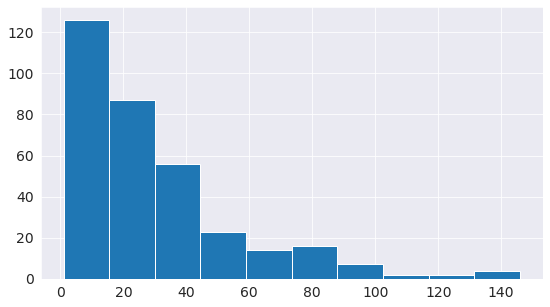

In [291]:
plt.hist(matches_df[matches_df['win_by_runs']!=0].win_by_runs);

Above histogram shows that margin of victory by runs is very less in majority of matches. This shows that major matches were very close matches

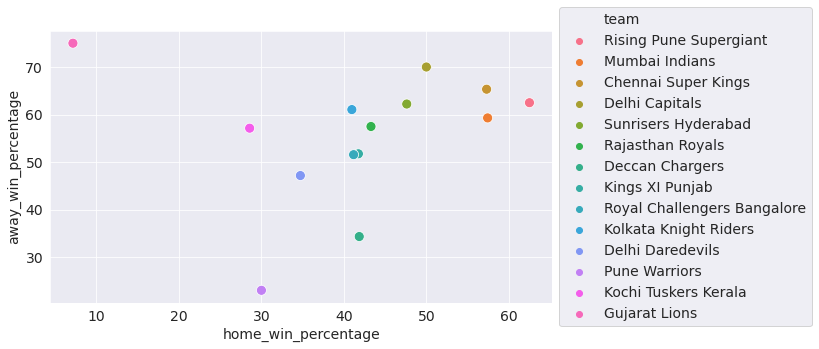

In [287]:
a=sns.scatterplot('home_win_percentage', 
                'away_win_percentage', 
                hue='team',
                s=100,
                data=teams_record_homeaway_df)
a.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1);

Above scatterplot shows that best home win percentage is of Rising Pune Supergiant and best away win percentage is of Gujarat Lions

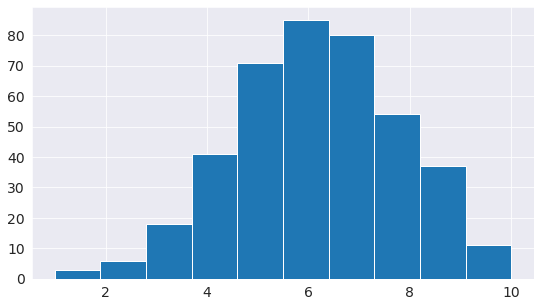

In [301]:
plt.hist(matches_df[matches_df['win_by_wickets']!=0].win_by_wickets);

Majority of matches win in terms of wickets were won by 5 or more wickets. This shows low score matches or one-sided matches for team batting second.

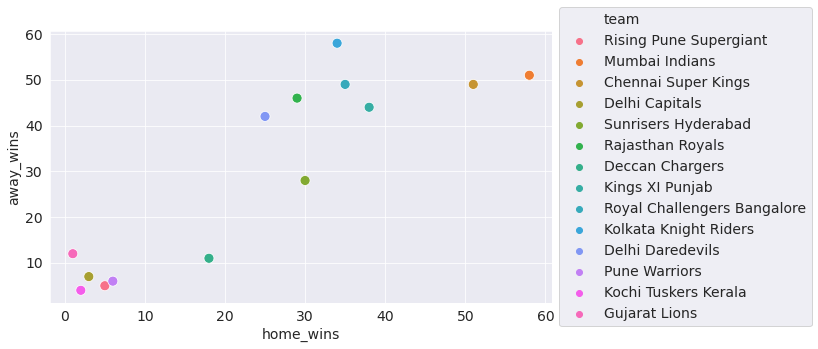

In [302]:
a=sns.scatterplot('home_wins', 
                'away_wins', 
                hue='team',
                s=100,
                data=teams_record_homeaway_df)
a.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1);

Above scatterplot shows Mumbai Indians has most number of home wins and Kolkata Knight Riders has most number of away wins in their respective buckets.

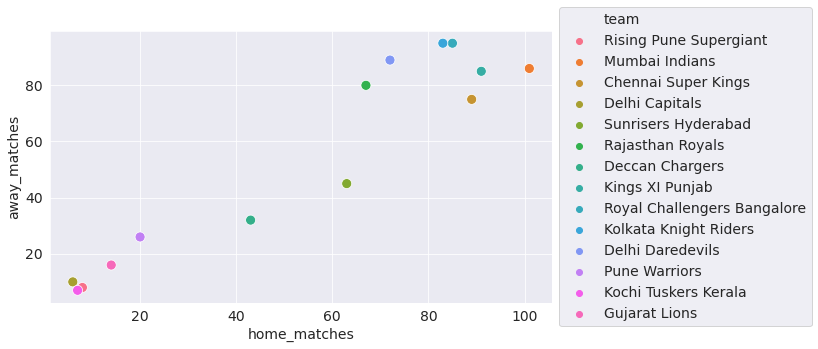

In [304]:
a=sns.scatterplot('home_matches', 
                'away_matches', 
                hue='team',
                s=100,
                data=teams_record_homeaway_df)
a.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1);

This scatterplot shows that "Mumbai" have played most number of home games while "Kolkata" and "Banglore" have played most number of away matches

Let us save and upload our work to Jovian before continuing

In [2]:
import jovian

In [327]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "dhurvladdha-cse22/data-analysis-of-ipl" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/dhurvladdha-cse22/data-analysis-of-ipl


'https://jovian.ml/dhurvladdha-cse22/data-analysis-of-ipl'

## Asking and Answering Questions

Lets ask some questions about our data like who scored most runs, who got out most etcetra.

#### Q1: Top 10 most dismissed players

In [39]:
no_of_dismissals=dismissal_df.groupby('player_dismissed')['dismissal_kind'].count().reset_index().sort_values(by='dismissal_kind',ascending=False).head(10).reset_index(drop=True)
no_of_dismissals.rename(columns={'dismissal_kind':'no_of_dismissal'},inplace=True)
no_of_dismissals.index = no_of_dismissals.index + 1
no_of_dismissals

,player_dismissed,no_of_dismissal
1,SK Raina,162
2,RG Sharma,155
3,RV Uthappa,153
4,V Kohli,143
5,S Dhawan,137
6,G Gambhir,136
7,KD Karthik,135
8,PA Patel,126
9,AM Rahane,116
10,AT Rayudu,115


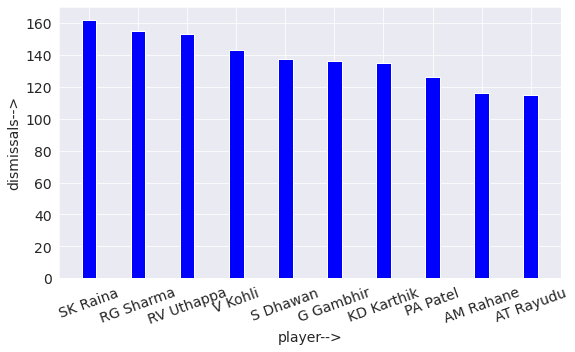

In [40]:
plt.bar(no_of_dismissals.player_dismissed,no_of_dismissals.no_of_dismissal,color='blue',width=0.3)
plt.xlabel('player-->')
plt.ylabel('dismissals-->')
plt.xticks(rotation=20)
plt.show()

#### As it can be seen in the graph, batsman "SK Raina" has been dismissed the most in the IPL

#### Q2: Top 10 run scrores in IPL

In [41]:
runs_df=deliveries_df.groupby('batsman')['batsman_runs'].agg(sum).reset_index().sort_values(by='batsman_runs',ascending=False).head(10).reset_index(drop=True)
runs_df.index = runs_df.index + 1
runs_df

,batsman,batsman_runs
1,V Kohli,5434
2,SK Raina,5415
3,RG Sharma,4914
4,DA Warner,4741
5,S Dhawan,4632
6,CH Gayle,4560
7,MS Dhoni,4477
8,RV Uthappa,4446
9,AB de Villiers,4428
10,G Gambhir,4223


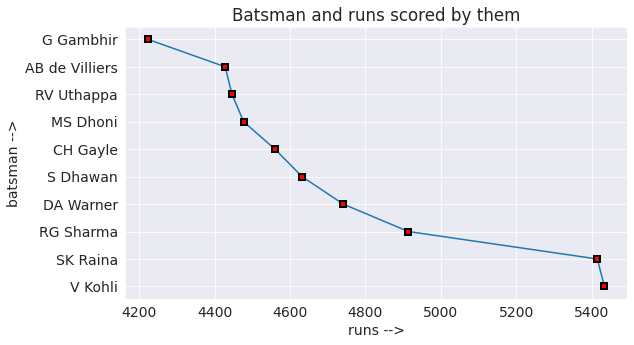

In [42]:
plt.plot(runs_df['batsman_runs'],runs_df['batsman'],marker='s',ms=6,mfc='r',mec='black',mew=2)
plt.xlabel('runs -->')
plt.ylabel('batsman -->')
plt.title('Batsman and runs scored by them')
plt.show()

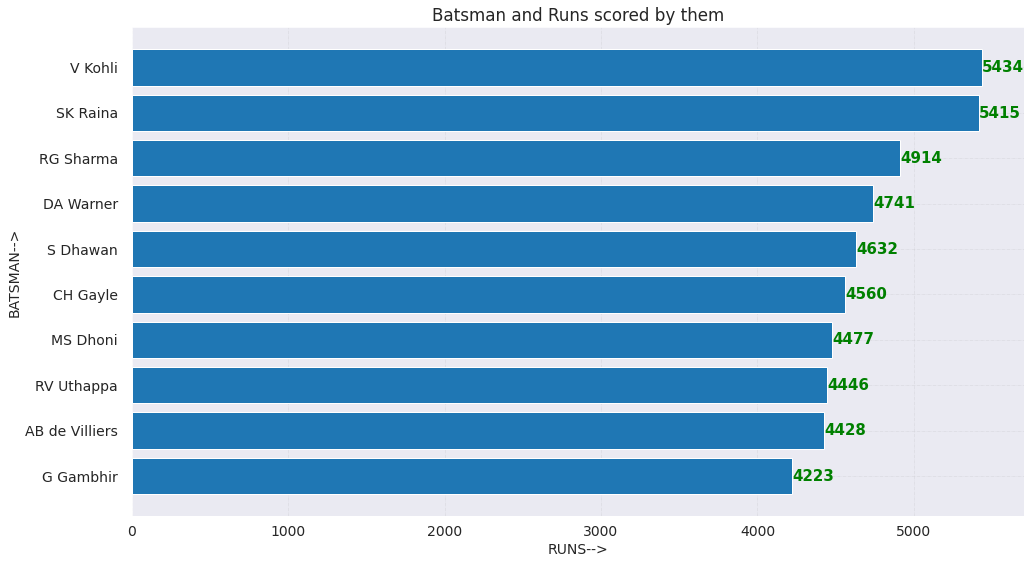

In [43]:
fig, ax = plt.subplots(figsize =(16, 9)) 
ax.barh(runs_df['batsman'],runs_df['batsman_runs'])
  
ax.xaxis.set_tick_params(pad = 5) 
ax.yaxis.set_tick_params(pad = 10) 
  
ax.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.5, 
        alpha = 0.2) 
  
ax.invert_yaxis() 
  
for i in ax.patches: 
    plt.text(i.get_width(), i.get_y()+0.5,  
             str(round((i.get_width()), 2)), 
             fontsize = 15, fontweight ='bold', 
             color ='green')
plt.xlabel('RUNS-->')  
plt.ylabel("BATSMAN-->")
ax.set_title('Batsman and Runs scored by them')
plt.show()

#### Q3: Sort teams according to most victories and which team has won the least matches

In [231]:
winner_count_df=matches_df.groupby('winner')['id'].count().reset_index().sort_values(by='id',ascending=False).reset_index(drop=True)
winner_count_df.rename(columns={'id':'no_of_wins'},inplace=True)
winner_count_df.index +=1

In [232]:
winner_count_df

,winner,no_of_wins
1,Mumbai Indians,109
2,Chennai Super Kings,100
3,Kolkata Knight Riders,92
4,Royal Challengers Bangalore,84
5,Kings XI Punjab,82
6,Rajasthan Royals,75
7,Delhi Daredevils,67
8,Sunrisers Hyderabad,58
9,Deccan Chargers,29
10,Rising Pune Supergiant,15


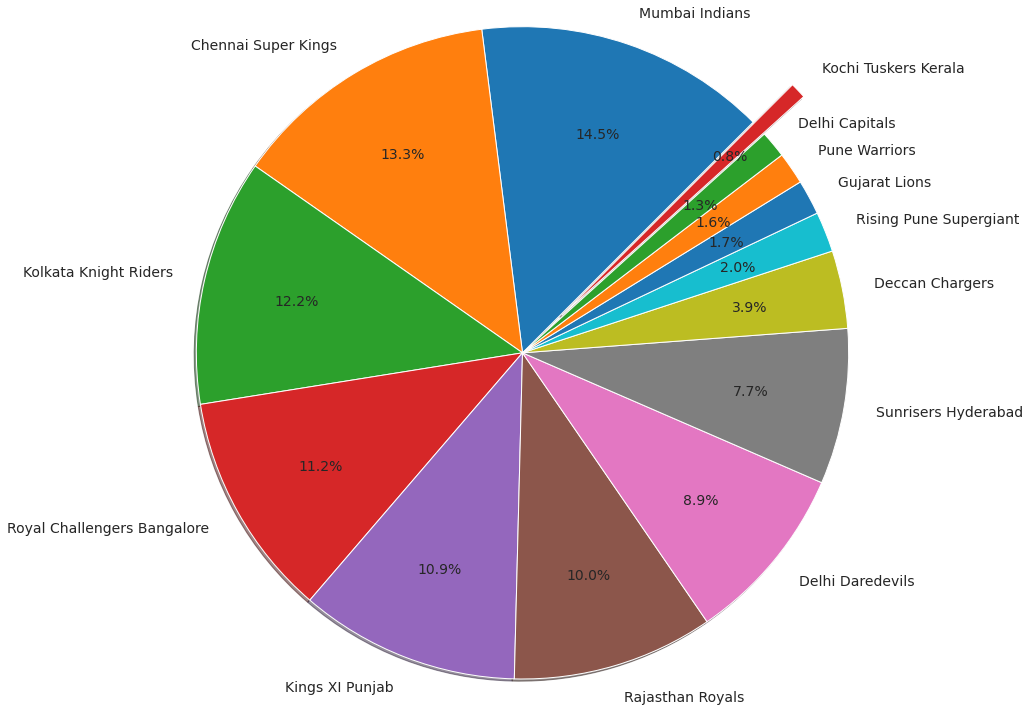

In [165]:
plt.pie(winner_count_df['no_of_wins'],labels=winner_count_df['winner'],radius=3,shadow=True,autopct='%1.1f%%',
        startangle=45,pctdistance=.71,explode=(0,0,0,0,0,0,0,0,0,0,0,0,0,0.5))
plt.show()

#### It is clearly visible from the pie chart that the team "Kochi Tuskers Kerala" have won the least no of matches.

#### Q4: Which bowler gave most extra runs show by comparing top 10 bowlers in a bar chart, also show top 10 wicket takers in IPL and plot top 50 wicket takers in histogram

In [233]:
most_extra_runs_df=deliveries_df[deliveries_df['legbye_runs']==0].groupby('bowler')['extra_runs'].sum().reset_index().sort_values(by='extra_runs',ascending=False).reset_index(drop=True).head(10)
most_extra_runs_df.index +=1

In [251]:
most_extra_runs_df

,bowler,extra_runs
1,SL Malinga,205
2,P Kumar,150
3,UT Yadav,145
4,DJ Bravo,133
5,B Kumar,124
6,I Sharma,123
7,R Ashwin,122
8,SR Watson,121
9,DS Kulkarni,118
10,DW Steyn,118


In [252]:
wickets_df=dismissal_df[dismissal_df['dismissal_kind']!='run out'].groupby('bowler')['match_id'].count().reset_index().sort_values(by='match_id',ascending=False).head(50).reset_index(drop=True)
wickets_df.rename(columns={'match_id':'Wickets','bowler':'Bowler'},inplace=True)
wickets_df.index +=1

In [253]:
print('Top 10 wicket takers :->')
wickets_df.head(10)

Top 10 wicket takers :->


,Bowler,Wickets
1,SL Malinga,170
2,A Mishra,156
3,Harbhajan Singh,150
4,PP Chawla,149
5,DJ Bravo,147
6,B Kumar,133
7,R Ashwin,125
8,SP Narine,122
9,UT Yadav,119
10,RA Jadeja,108


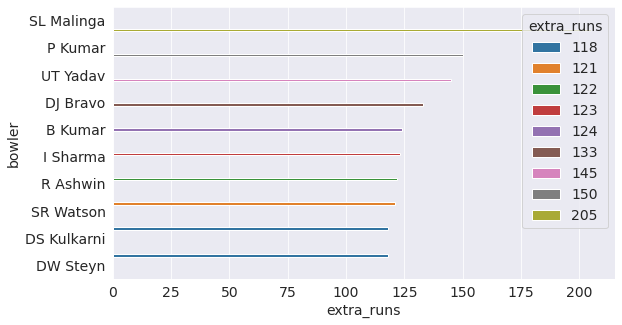

In [254]:
sns.barplot(most_extra_runs_df['extra_runs'],most_extra_runs_df['bowler'], hue='extra_runs', data=most_extra_runs_df);

#### We can see in the bar-plot that bowler  "SL Malinga"  has given the most extra runs

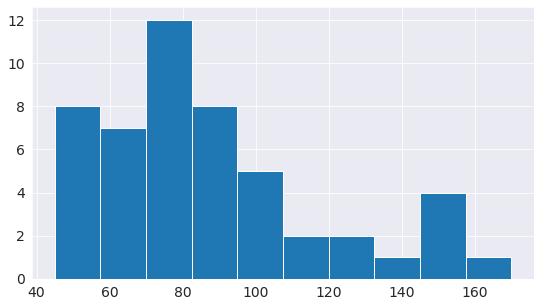

In [255]:
plt.hist(wickets_df.Wickets);

#### Q5: State the different dismissal kinds and number of batsman getting out by that type, graphically

In [241]:
dismissal_type=dismissal_df.groupby('dismissal_kind')['match_id'].count().reset_index().sort_values(by='match_id',ascending=False).reset_index(drop=True)
dismissal_type.index +=1
dismissal_type.rename(columns={'match_id':'No. of dismissals'},inplace=True)

In [242]:
dismissal_type

,dismissal_kind,No. of dismissals
1,caught,5348
2,bowled,1581
3,run out,852
4,lbw,540
5,stumped,278
6,caught and bowled,211
7,retired hurt,12
8,hit wicket,10
9,obstructing the field,2


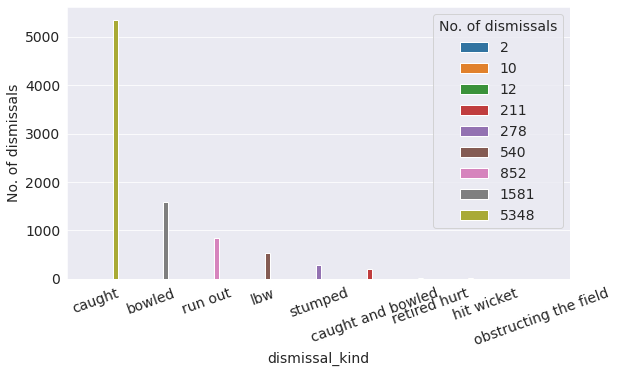

In [250]:
sns.barplot(dismissal_type['dismissal_kind'],dismissal_type['No. of dismissals'], hue='No. of dismissals', data=dismissal_type);
plt.xticks(rotation=20);

Let us save and upload our work to Jovian before continuing.

In [48]:
import jovian

In [4]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "dhurvladdha-cse22/data-analysis-of-ipl" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/dhurvladdha-cse22/data-analysis-of-ipl


'https://jovian.ml/dhurvladdha-cse22/data-analysis-of-ipl'

## Inferences and Conclusion

We can see the data of teams, victories of teams etc. Also we saw the most successful batsman and most dismissed ones too, we found that most batsman featuring in most run scored dataset are also featuring in most dismissed dataset. We also saw that the bowler "SL Malinga" who has took maximum wickets in the tournament till now is also most expensive in terms of extra runs given.

Looking at diffetent types of dismissals we found that most players got out as caught, so this means they were trying for playing shots or edged as expected in T-20 cricket. 

This dataset is very good data and record, it has vast amount of details and record for manupulation. We can even try finding out toss win percent and compare with win percent etcetra etcetra.

In [50]:
import jovian

In [5]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "dhurvladdha-cse22/data-analysis-of-ipl" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/dhurvladdha-cse22/data-analysis-of-ipl


'https://jovian.ml/dhurvladdha-cse22/data-analysis-of-ipl'

## References and Future Work

This dataset can be used for future analytics of players, their playing capabilities for future selections.
Following links came to be useful and can be refered:

www.pandas.pydata.org

www.geeksforgeeks.org

www.seaborn.pydata.org

www.matplotlib.org

www.stackoverflow.com community

Jovian Community

In [6]:
import jovian

In [8]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "dhurvladdha-cse22/data-analysis-of-ipl" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/dhurvladdha-cse22/data-analysis-of-ipl


'https://jovian.ml/dhurvladdha-cse22/data-analysis-of-ipl'